In [391]:
!pip install nsepy

In [0]:
from nsepy import get_history
from datetime import date
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

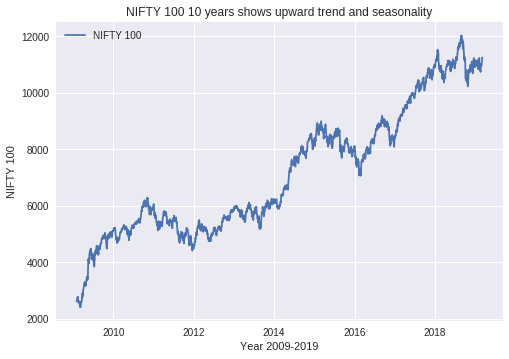

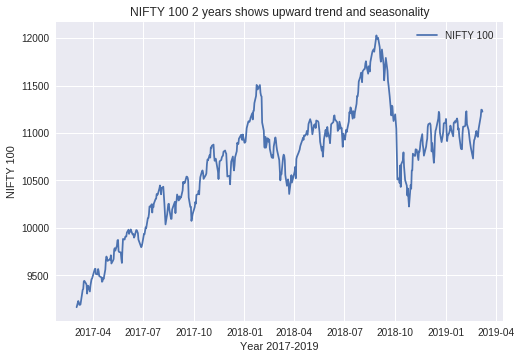

In [421]:
prices = get_history(symbol='NIFTY 100', start = date(2009,2,1), end = date.today(), index = True)
prices = prices[['Close']]
tenyears = prices

prices = prices[len(prices)-500:len(prices)]

plt.plot(tenyears, label='NIFTY 100')
plt.title('NIFTY 100 10 years shows upward trend and seasonality')
plt.ylabel('NIFTY 100')
plt.xlabel('Year 2009-2019')
plt.legend()
plt.show()

plt.plot(prices, label='NIFTY 100')
plt.title('NIFTY 100 2 years shows upward trend and seasonality')
plt.ylabel('NIFTY 100')
plt.xlabel('Year 2017-2019')
plt.legend()
plt.show()




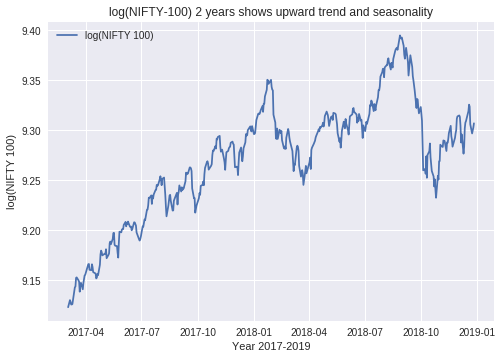

In [406]:
lenprice = len(prices)
testval = prices[lenprice-100:].values
prices = prices[:lenprice-50]

lnprices = np.log(prices)


plt.plot(lnprices, label='log(NIFTY 100)')
plt.title('log(NIFTY-100) 2 years shows upward trend and seasonality')
plt.ylabel('log(NIFTY 100)')
plt.xlabel('Year 2017-2019')
plt.legend()
plt.show()

In [407]:
#Dickey-Fuller Test

dftest = adfuller(lnprices['Close'], 1)
print(dftest)

(-2.3574084780515094, 0.154120016978394, 1, 448, {'1%': -3.4450311708077743, '5%': -2.8680131035505023, '10%': -2.570217924306441}, -3148.7360053381553)


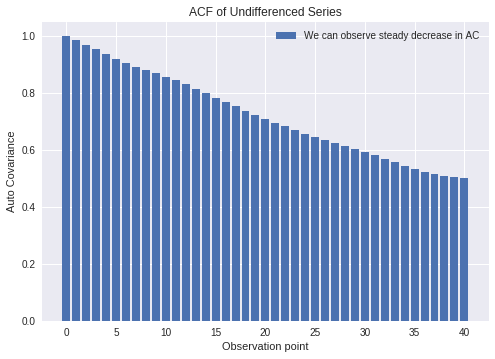

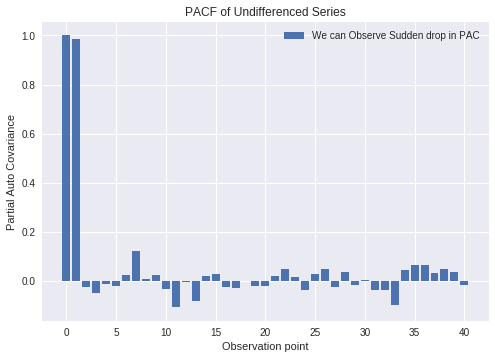

In [408]:
acf_1 = acf(lnprices)
ind = []
for i in range(0,len(acf_1)):
  ind.append(i)
plt.bar(ind,acf_1, label='We can observe steady decrease in AC')
plt.title('ACF of Undifferenced Series')
plt.xlabel('Observation point')
plt.ylabel('Auto Covariance')
plt.legend()
plt.show()


pacf_1 = pacf(lnprices)
jnd =[]
for j in range(0,len(pacf_1)):
  jnd.append(j)
  
plt.bar(jnd,pacf_1, label='We can Observe Sudden drop in PAC')
plt.title('PACF of Undifferenced Series')
plt.xlabel('Observation point')
plt.ylabel('Partial Auto Covariance')
plt.legend()
plt.show()

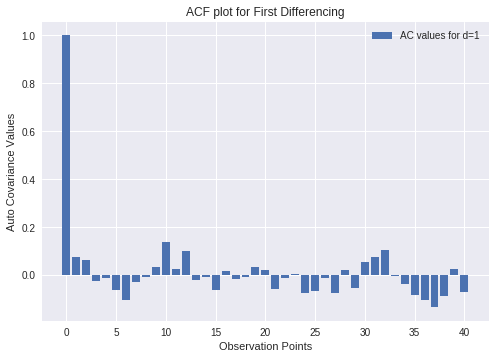

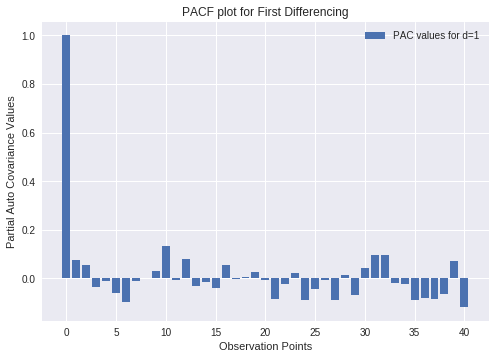

In [411]:
ln_diff = lnprices - lnprices.shift()
diff = ln_diff.dropna()
diff2 = diff - diff.shift()
diff2 = diff2.dropna()

acf_2 = acf(diff)
ind2 = []
for i2 in range(0,len(acf_2)):
  ind2.append(i2)
plt.bar(ind2,acf_2,label = 'AC values for d=1')
plt.title('ACF plot for First Differencing')
plt.xlabel('Observation Points')
plt.ylabel('Auto Covariance Values')
plt.legend()
plt.show()

pacf_2 = pacf(diff)
jnd2 = []
for j2 in range(0,len(pacf_2)):
  jnd2.append(j2)
plt.bar(jnd2,pacf_2,label = 'PAC values for d=1')
plt.title('PACF plot for First Differencing')
plt.xlabel('Observation Points')
plt.ylabel('Partial Auto Covariance Values')
plt.legend()
plt.show()

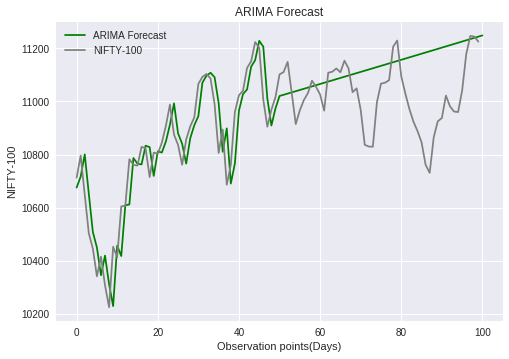

In [416]:
price_matrix = lnprices.as_matrix()

model = ARIMA(price_matrix, order = (0,1,0))
model_fit = model.fit(disp=0)
pred = model_fit.predict(lenprice-100,lenprice, typ='levels')
pred_adj = np.exp(pred)
plt.plot(pred_adj, color='green', label='ARIMA Forecast')
plt.plot(testval,color='grey', label='NIFTY-100')
plt.title('ARIMA Forecast')
plt.xlabel('Observation points(Days)')
plt.ylabel('NIFTY-100')
plt.legend()
plt.show()
